<a href="https://colab.research.google.com/github/SergeyAnufriev/CFD_unet/blob/main/notebooks/Mesh_data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!rm -rf /content/CFD_unet
!git clone https://github.com/SergeyAnufriev/CFD_unet.git

Cloning into 'CFD_unet'...
remote: Enumerating objects: 366, done.
remote: Counting objects: 100% (366/366), done.
remote: Compressing objects: 100% (258/258), done.
remote: Total 366 (delta 121), reused 336 (delta 101), pack-reused 0
Receiving objects: 100% (366/366), 40.98 MiB | 14.33 MiB/s, done.
Resolving deltas: 100% (121/121), done.
Checking out files: 100% (455/455), done.


#This notebook investigates CFD simulation data


In [1]:
import pandas as pd
import glob
import sys 

In [2]:
sys.path.append('/content/CFD_unet')

In [7]:
files_c = glob.glob(r'/content/CFD_unet/dataset/*_c.txt')
files_n = glob.glob(r'/content/CFD_unet/dataset/*_n.txt')

In [4]:
def read_file_n(dir_):
  df = pd.read_csv(dir_,sep =' ',header=None)
  df = df.drop(labels=list(range(1, 15, 2)),axis=1)
  df.columns = ['node_num','node_type','x','y','P','u_x','u_y','cav']
  df = df.astype({"P": float, "cav": float})

  return df


In [8]:
df = read_file_n(files_n[17])

In [9]:
df_total = pd.concat([read_file_n(x) for x in files_n])

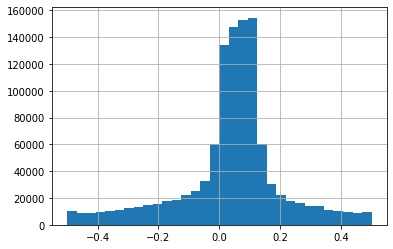

In [14]:
df_total['x'].hist(bins=32)

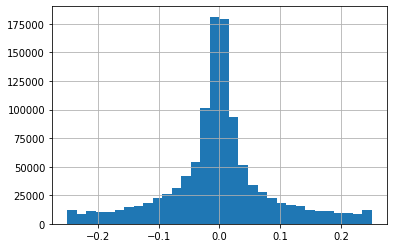

In [13]:
df_total['y'].hist(bins=32)

In [15]:
import numpy as np

In [19]:
np.var(df_total['x'].values*5.8)

0.9985089213797815

In [20]:
np.var(df_total['y'].values*11.4)

0.9977092690242908

In [23]:
import matplotlib.pyplot as plt

(array([ 11771.,   8195.,  10877.,  10281.,  10728.,  12516.,  14304.,
         15496.,  18327.,  22350.,  25777.,  31588.,  41869.,  54087.,
        101618., 181333., 179396.,  93423.,  51703.,  34121.,  28012.,
         22946.,  18029.,  16390.,  15496.,  12516.,  11473.,  11473.,
          9685.,   9238.,   8344.,  12218.]),
 array([-2.85    , -2.671875, -2.49375 , -2.315625, -2.1375  , -1.959375,
        -1.78125 , -1.603125, -1.425   , -1.246875, -1.06875 , -0.890625,
        -0.7125  , -0.534375, -0.35625 , -0.178125,  0.      ,  0.178125,
         0.35625 ,  0.534375,  0.7125  ,  0.890625,  1.06875 ,  1.246875,
         1.425   ,  1.603125,  1.78125 ,  1.959375,  2.1375  ,  2.315625,
         2.49375 ,  2.671875,  2.85    ]),
 <a list of 32 Patch objects>)

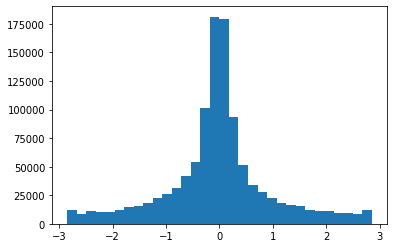

In [25]:
plt.hist(df_total['y'].values*11.4,bins=32)

In [ ]:
files_n[7]

'/content/CFD_unet/dataset/116ah93w174_193_50_11594_459_146_n.txt'

In [ ]:
df.head()

,node_num,node_type,x,y,P,u_x,u_y,cav
0,0,2,0.115,0.000182,42400.0,0.00000,0.000000,1.0
1,1,1,0.500,0.250000,42400.0,1.94752,-0.455176,1.0
2,2,1,0.500,-0.250000,42400.0,1.94752,-0.455176,1.0
3,3,3,-0.500,-0.250000,42400.0,1.94752,-0.455176,1.0
4,4,3,-0.500,0.250000,42400.0,1.94752,-0.455176,1.0


In [ ]:
df['cav'].value_counts()

1.0    7420
Name: cav, dtype: int64

In [ ]:
len(df['P'].value_counts())

1

In [ ]:
flies_repeat = []

count = 0
for file_ in files_n:
  df = read_file_n(file_)
  if len(df['P'].value_counts()) ==1:
    count+=1
    flies_repeat.append(file_.split('/')[-1])

In [ ]:
flies_repeat

['17ag12_196_-39_13723_566_-114_n.txt',
 '12e591_196_-36_16594_709_-104_n.txt',
 '14e343_196_-35_11131_436_-102_n.txt',
 '24naca0015_199_-17_10813_420_-49_n.txt',
 '31ag16_198_24_12342_497_68_n.txt',
 '126e379_198_25_14836_621_72_n.txt',
 '80e178_194_-45_17719_765_-131_n.txt',
 '27e544_195_-42_11879_473_-122_n.txt',
 '122e562_198_-22_11051_432_-65_n.txt',
 '46c5a_198_-22_12317_495_-65_n.txt',
 '3e387_198_-20_11678_463_-58_n.txt',
 '52arad20_194_-44_17170_738_-128_n.txt',
 '115ah81131_195_-41_12098_484_-120_n.txt',
 '117e377_198_23_14434_601_66_n.txt',
 '107e1213_195_-43_17121_736_-126_n.txt',
 '95clarym15_198_27_15667_663_77_n.txt',
 '116ah93w174_193_50_11594_459_146_n.txt',
 '96e182_194_-48_17822_771_-138_n.txt',
 '124b737a_196_-37_16131_686_-108_n.txt',
 '68e377_198_-23_10953_427_-68_n.txt',
 '108e668_195_42_10538_406_123_n.txt',
 '111dae21_194_47_11680_464_137_n.txt',
 '65e205_198_-25_11571_458_-74_n.txt',
 '127atr72sm_199_-17_11176_438_-51_n.txt',
 '128ag16_194_-45_11954_477_-131_n

In [ ]:
count

68

In [ ]:
len(files_n)

149

In [ ]:
68/149

0.4563758389261745

In [ ]:
files_n[7]

'/content/gdrive/MyDrive/cfd_data_mesh/27e544_195_-42_11879_473_-122_n.txt'

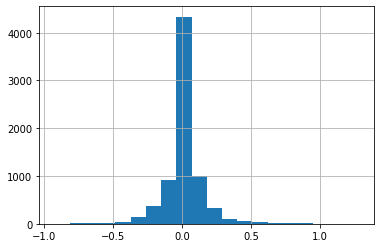

In [ ]:
df['u_y'].hist(bins=20)

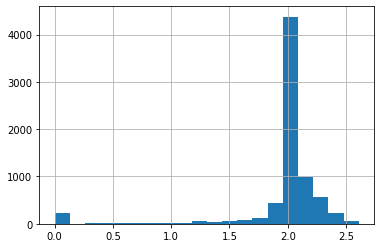

In [ ]:
df['u_x'].hist(bins=20)

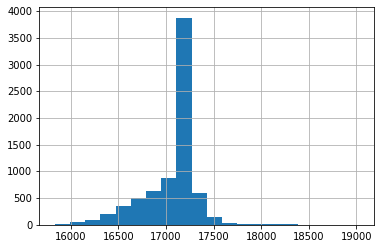

In [ ]:
df['P'].hist(bins=20)